In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import zscore

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../../data/sierraleone-bumbuna.csv')
df.sample(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
392958,2022-07-29 21:19,-0.8,-0.2,-1.1,0.0,0.0,24.7,87.8,0.0,0.0,0.0,0.0,0.0,1004,0,0.0,25.0,25.3,NaN
488198,2022-10-04 00:39,-1.0,-0.1,-1.4,0.0,0.0,23.9,99.0,1.1,1.9,0.5,109.1,10.4,1000,0,0.0,24.0,24.3,NaN
40414,2021-11-27 01:35,-1.6,-0.3,-1.8,0.0,0.0,22.8,98.0,0.6,0.7,0.5,58.1,0.2,1000,0,0.0,22.8,23.2,NaN
440103,2022-08-31 15:04,199.6,5.2,194.5,192.3,184.6,27.4,88.3,0.7,1.6,0.6,158.4,5.4,1000,0,0.0,29.6,29.4,NaN
438019,2022-08-30 04:20,-9.3,-0.2,-9.6,0.0,0.0,22.6,100.0,0.0,0.0,0.0,0.0,0.0,1001,0,0.0,22.8,22.9,NaN
202749,2022-03-19 19:10,-10.4,-0.6,-10.3,0.6,0.5,31.1,38.3,1.7,2.4,0.4,206.0,11.6,997,0,0.0,30.6,30.8,NaN
258126,2022-04-27 06:07,-9.3,0.0,-9.1,0.0,0.0,24.0,87.7,0.0,0.0,0.0,0.0,0.0,998,0,0.0,24.5,24.9,NaN
1041,2021-10-30 17:22,144.8,1.6,144.6,146.9,140.9,27.9,83.5,2.0,2.6,0.5,254.4,16.4,1000,0,0.0,32.4,32.8,NaN
170765,2022-02-25 14:06,595.5,214.8,396.9,620.4,605.7,33.1,50.3,2.4,3.4,0.6,255.5,19.5,999,0,0.0,55.4,55.9,NaN
508533,2022-10-18 03:34,-0.8,-0.1,-1.5,0.0,0.0,23.2,100.0,0.0,0.0,0.0,0.0,0.0,1001,0,0.0,23.9,24.1,NaN


In [3]:
df.describe(include='number')

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [4]:
# Check for missing values
df.isna().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isna().sum() / len(df)) * 100

# List columns with more than 5% missing values
columns_with_nulls = missing_percentage[missing_percentage > 5]
print("Columns with more than 5% missing values:")
print(columns_with_nulls)

# Drop columns with na values
df = df.dropna(subset=['GHI', 'DNI','DHI', 'ModA', 'ModB','WS', 'WSgust']).copy()
df = df.reindex().copy()

# remove incorrect entries for GHI, the possible values for Global Horizontal Irradiance (GHI) are between 0 and 1000 W/m²
df = df[(df['GHI'] >= 0) & (df['GHI'] <= 1000)].copy()
# remove incorrect entries for DNI, the possible values for Direct Normal Irradiance (DNI) are between 0 and 1000 W/m²
df = df[(df['DNI'] >= 0) & (df['DNI'] <= 1000)].copy()
# remove incorrect entries for DHI, the possible values for Diffuse Horizontal Irradiance (DHI) are between 0 and 1000 W/m²
df = df[(df['DHI'] >= 0) & (df['DHI'] <= 1000)].copy()


Columns with more than 5% missing values:
Comments    100.0
dtype: float64


In [6]:
df.shape

(232362, 19)

In [7]:
# Compute Z-scores for GHI, DNI, and DHI, 'ModA', 'ModB', 'WS', and 'WSgust'
z_scores = zscore(df[['GHI', 'DNI','DHI', 'ModA', 'ModB','WS', 'WSgust']])
# Create a DataFrame for Z-scores to align indices
z_scores_df = pd.DataFrame(z_scores, columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'], index=df.index)

# Identify outliers using Z-scores
# A Z-score greater than 3 or less than -3 is typically considered an outlier
# Filter the DataFrame to get the outliers
outliers = df[np.abs(z_scores_df) > 3].any(axis=1)

# Display the outliers
print("Outliers based on Z-scores:")
outliers

Outliers based on Z-scores:


432       False
433       False
434       False
435       False
436       False
          ...  
525223    False
525224    False
525225    False
525226    False
525227    False
Length: 232362, dtype: bool

In [8]:
# Drop rows with outliers
df_cleaned = df.loc[~outliers].reset_index(drop=True).copy()
df_cleaned.shape

(230742, 19)

In [9]:
# Exporting the cleaned DataFrame to a CSV file
df_cleaned.to_csv('../../data/sierraleone-cleaned.csv', index=False)

In [10]:
# Convert the 'Timestamp' column to datetime format
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
df_cleaned.set_index('Timestamp', inplace=True)

#### GHI Over Time

This block plots the Global Horizontal Irradiance (GHI) over time using a line plot. It helps visualize the temporal trends and variability in solar irradiance throughout the dataset period.

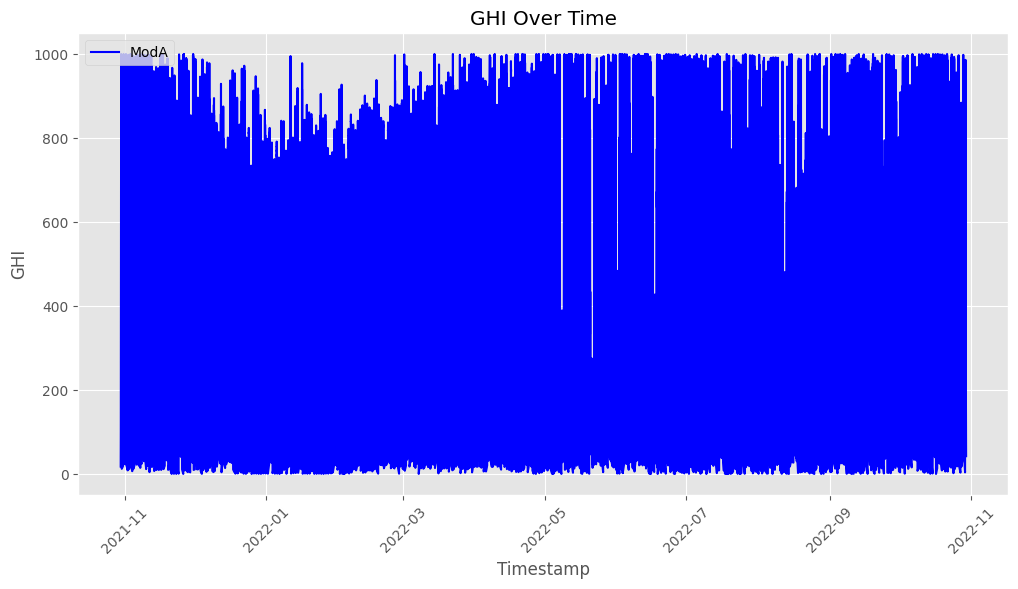

In [27]:

# Plot GHI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['GHI'], label='ModA', color='blue')
plt.title("GHI Over Time")
plt.xticks(rotation=45)
plt.show()

#### DNI Over Time

This block plots the Direct Normal Irradiance (DNI) over time. The line plot allows you to observe how DNI changes across the recorded timestamps, highlighting daily and seasonal patterns.

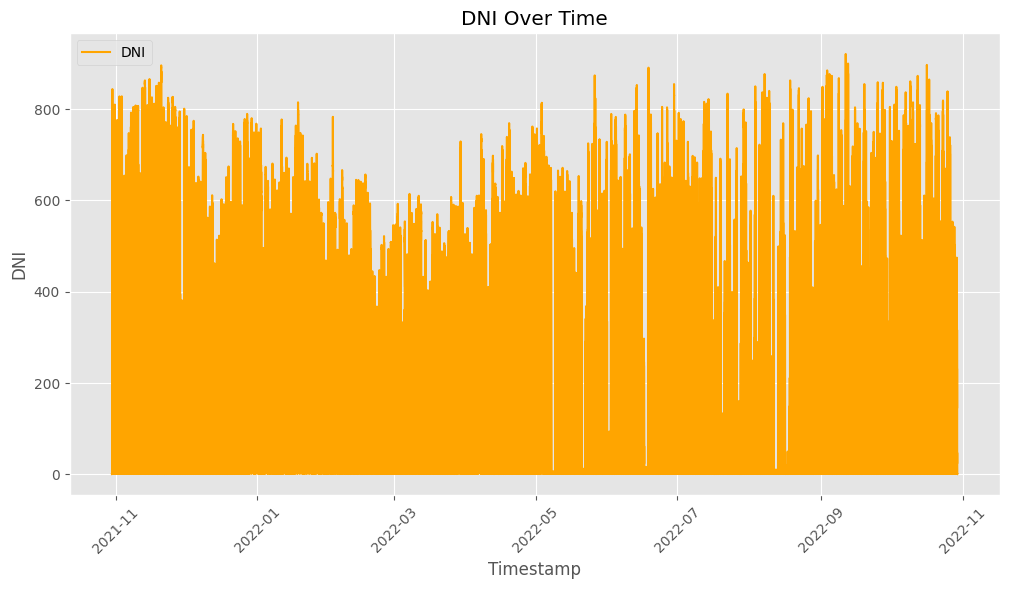

In [12]:
# Plot DNI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['DNI'], label='DNI', color='orange')
plt.title("DNI Over Time")
plt.xticks(rotation=45)
plt.show()

#### DHI Over Time

This block plots the Diffuse Horizontal Irradiance (DHI) over time. The visualization helps in understanding the contribution of diffuse sunlight to the total irradiance.

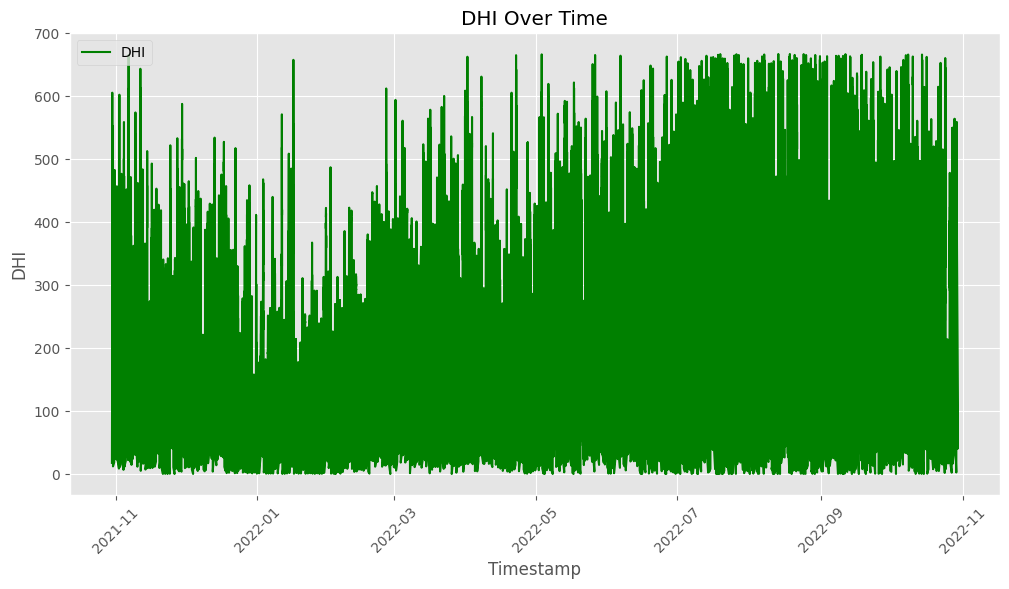

In [13]:
# Plot DHI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['DHI'], label='DHI', color='green')
plt.title("DHI Over Time")
plt.xticks(rotation=45)
plt.show()

#### Tamb Over Time

This block plots the ambient temperature (Tamb) over time. It provides insights into temperature fluctuations and their possible impact on solar panel performance.

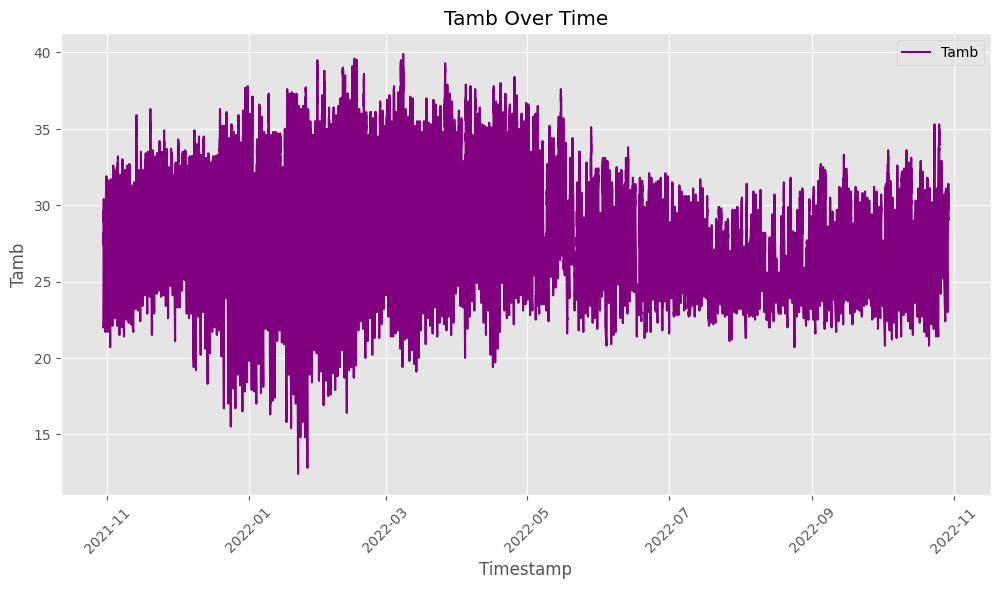

In [14]:
# Plot Tamb  over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['Tamb'], label='Tamb', color='purple')
plt.title("Tamb Over Time")
plt.xticks(rotation=45)
plt.show()

#### Average ModA & ModB Pre/Post Cleaning

This block groups the data by the 'Cleaning' status and calculates the mean values of ModA and ModB before and after cleaning. The resulting bar plot shows the effect of cleaning on module performance.

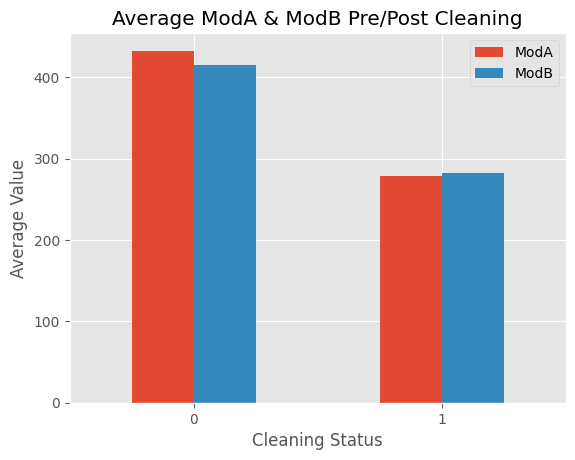

In [15]:
# Group by 'Cleaning' and calculate the mean of ModA and ModB
mod_means = df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Plot the averages
mod_means.plot(x='Cleaning', y=['ModA', 'ModB'], kind='bar')
plt.title('Average ModA & ModB Pre/Post Cleaning')
plt.ylabel('Average Value')
plt.xlabel('Cleaning Status')
plt.xticks(rotation=0)
plt.show()

#### Correlation Heatmap

This block repeats the correlation heatmap for GHI, DNI, DHI, TModA, and TModB, providing a visual summary of how these variables are interrelated.

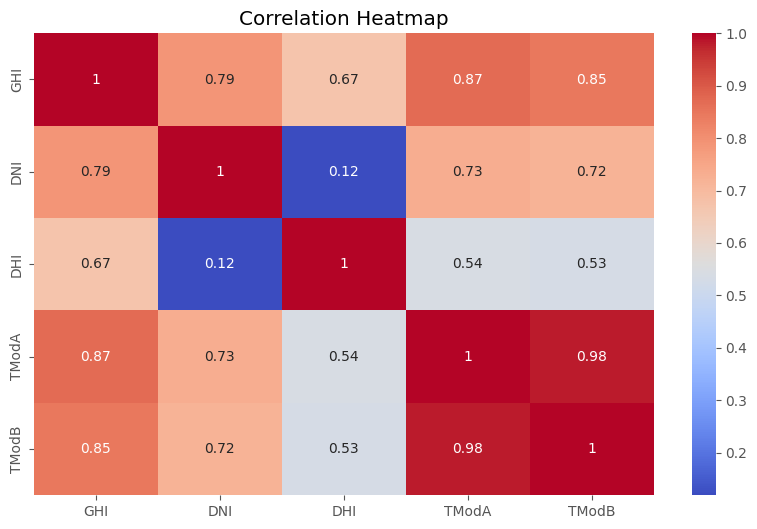

In [16]:
# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Scatter Plots: WS, WSgust, WD vs. GHI

These blocks create scatter plots to explore the relationships between wind speed (WS), wind gust (WSgust), wind direction (WD), and GHI. They help identify if wind conditions have any observable effect on solar irradiance.

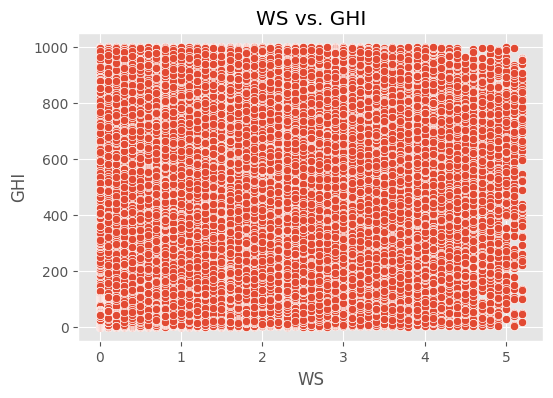

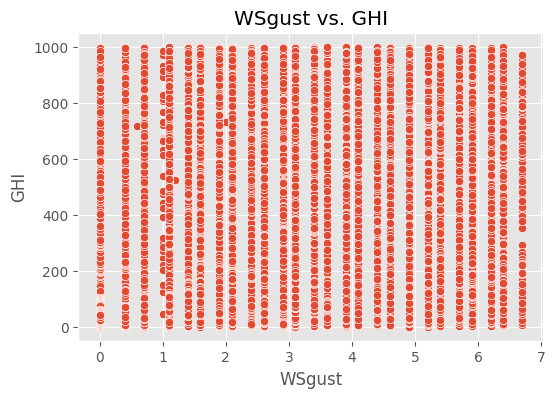

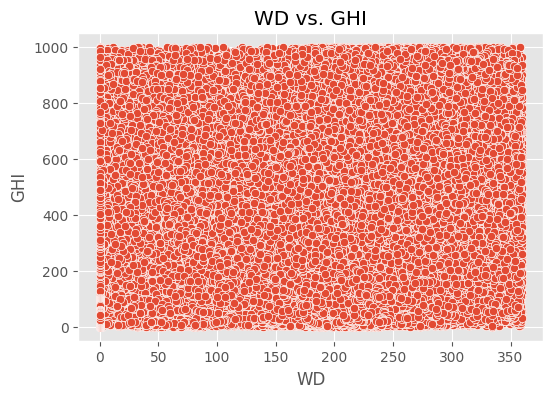

In [17]:
# Scatter plot: WS vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WS'], y=df_cleaned['GHI'])
plt.title('WS vs. GHI')
plt.xlabel('WS')
plt.ylabel('GHI')
plt.show()

# Scatter plot: WSgust vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WSgust'], y=df_cleaned['GHI'])
plt.title('WSgust vs. GHI')
plt.xlabel('WSgust')
plt.ylabel('GHI')
plt.show()

# Scatter plot: WD vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WD'], y=df_cleaned['GHI'])
plt.title('WD vs. GHI')
plt.xlabel('WD')
plt.ylabel('GHI')
plt.show()


#### Scatter Plots: RH vs. Tamb and RH vs. GHI

These blocks generate scatter plots to examine how relative humidity (RH) relates to ambient temperature (Tamb) and GHI. They help assess whether humidity influences temperature readings or solar radiation.

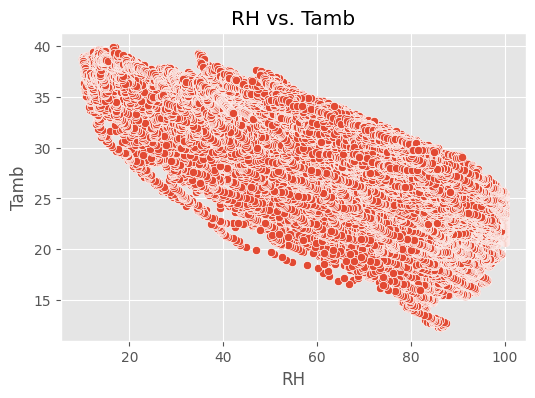

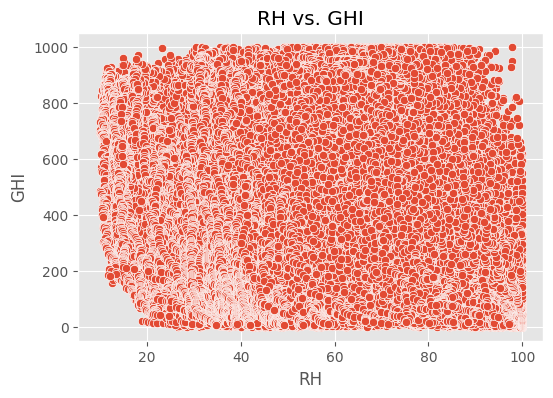

In [30]:
# Scatter plot: RH vs. Tamb
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['RH'], y=df_cleaned['Tamb'])
plt.title('RH vs. Tamb')
plt.xlabel('RH')
plt.ylabel('Tamb')
plt.show()

# Scatter plot: RH vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['RH'], y=df_cleaned['GHI'])
plt.title('RH vs. GHI')
plt.xlabel('RH')
plt.ylabel('GHI')
plt.show()

#### Correlation Coefficients: RH vs. Tamb and RH vs. GHI

This block calculates and prints the correlation coefficients between RH and Tamb, and RH and GHI. These values quantify the strength and direction of the relationships observed in the previous scatter plots.

In [19]:
# Calculate and print correlation coefficients
corr_rh_tamb = df_cleaned['RH'].corr(df_cleaned['Tamb'])
corr_rh_ghi = df_cleaned['RH'].corr(df_cleaned['GHI'])
print(f"Correlation between RH and Tamb: {corr_rh_tamb:.2f}")
print(f"Correlation between RH and GHI: {corr_rh_ghi:.2f}")

Correlation between RH and Tamb: -0.85
Correlation between RH and GHI: -0.44


#### Wind Rose (WS/WD)

This block creates a wind rose plot to visualize the distribution of wind speed and direction. It provides a comprehensive view of wind patterns at the site.

<Figure size 800x800 with 0 Axes>

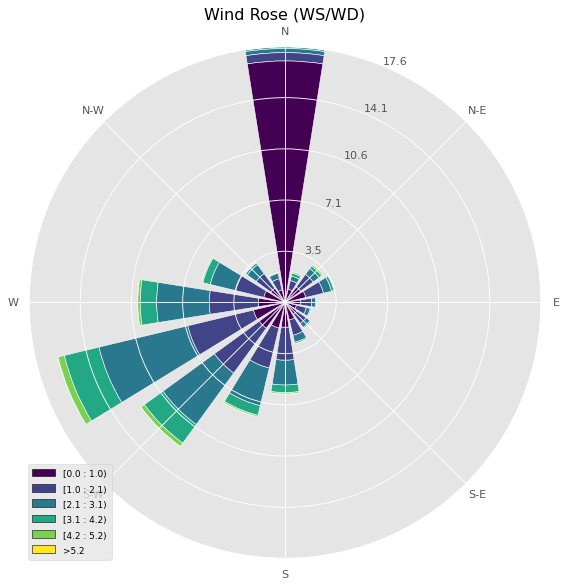

In [20]:
from windrose import WindroseAxes

# Wind rose plot for Wind Speed (WS) and Wind Direction (WD)
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df_cleaned['WD'], df_cleaned['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose (WS/WD)')
ax.set_legend()
plt.show()

#### Histograms: GHI and WS

These blocks plot histograms for GHI and wind speed (WS), showing the frequency distribution of these variables. The histograms help identify typical values and the spread of the data.

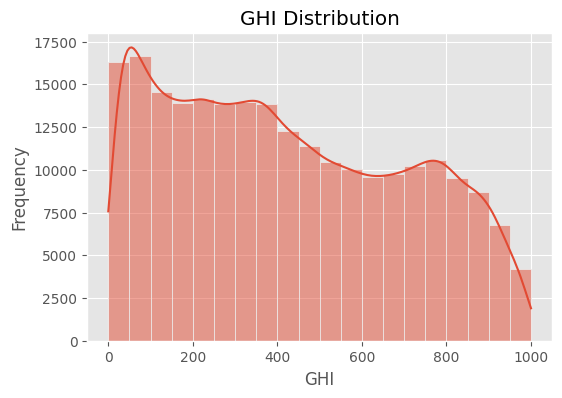

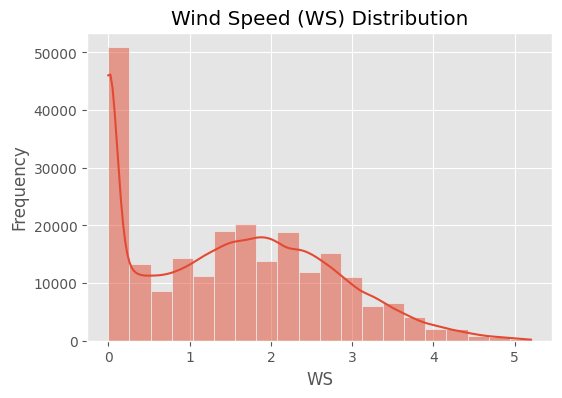

In [21]:
# Histogram for GHI
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['GHI'], bins=20, kde=True)
plt.title("GHI Distribution")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

# Histogram for WS
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['WS'], bins=20, kde=True)
plt.title("Wind Speed (WS) Distribution")
plt.xlabel("WS")
plt.ylabel("Frequency")
plt.show()

#### Bubble Chart: GHI vs. Tamb (Bubble Size = RH)

This block creates a bubble chart where GHI is plotted against Tamb, and the size and color of each bubble represent the relative humidity (RH). This visualization allows for multi-dimensional analysis of how temperature and humidity interact with solar irradiance.

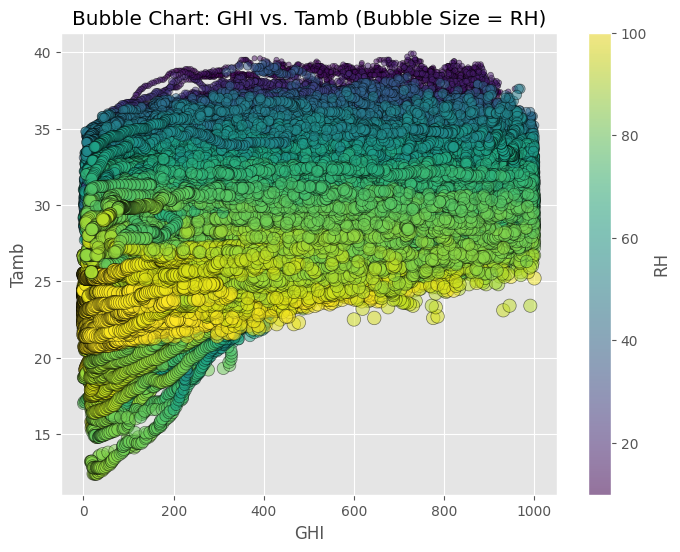

In [22]:
# Bubble chart: GHI vs. Tamb, bubble size = RH
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['GHI'], df_cleaned['Tamb'], 
            s=df_cleaned['RH'],  # Bubble size
            alpha=0.5, c=df_cleaned['RH'], cmap='viridis', edgecolor='k')
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.colorbar(label='RH')
plt.show()